#### 1. Load data

In [20]:
import numpy as np

X = np.loadtxt('./data/x.dat')
y = np.loadtxt('./data/y.dat')

#### 2. Locally-weighted logistic regression

In [21]:
def lwlr(X_train, y_train, x, tau):
    """
    Locally Weighted Logistic Regression (LWLR)

    Parameters:
    X_train (numpy.ndarray): Training feature matrix (m x n)
    y_train (numpy.ndarray): Training labels (m x 1)
    x (numpy.ndarray): Query point (n x 1)
    tau (float): Bandwidth parameter for weighting

    Returns:
    int: Predicted label (0 or 1) for the query point x
    """
    m, n = X_train.shape
    theta = np.zeros(n)

    # compute weights
    diff = X_train - x.T
    w = np.exp(-np.sum(diff**2, axis=1)/(2*tau**2))

    # perform Newtons's method
    g = np.ones(n) # gradient
    while np.linalg.norm(g) > 1e-6:
        h  = 1./(1+np.exp(-X_train @ theta))
        g = X_train.T @ (w * (y_train - h)) - 1e-4 * theta
        H = -(X_train.T @ np.diag(w * h * (1 - h)) @ X_train) - 1e-4 * np.eye(n)
        theta -= np.linalg.solve(H, g) # Hx = g
    
    return int(x.T @ theta > 0)

#### 3. Plot the decision boundary of ordinary (unweighted) logistic regression using different taus

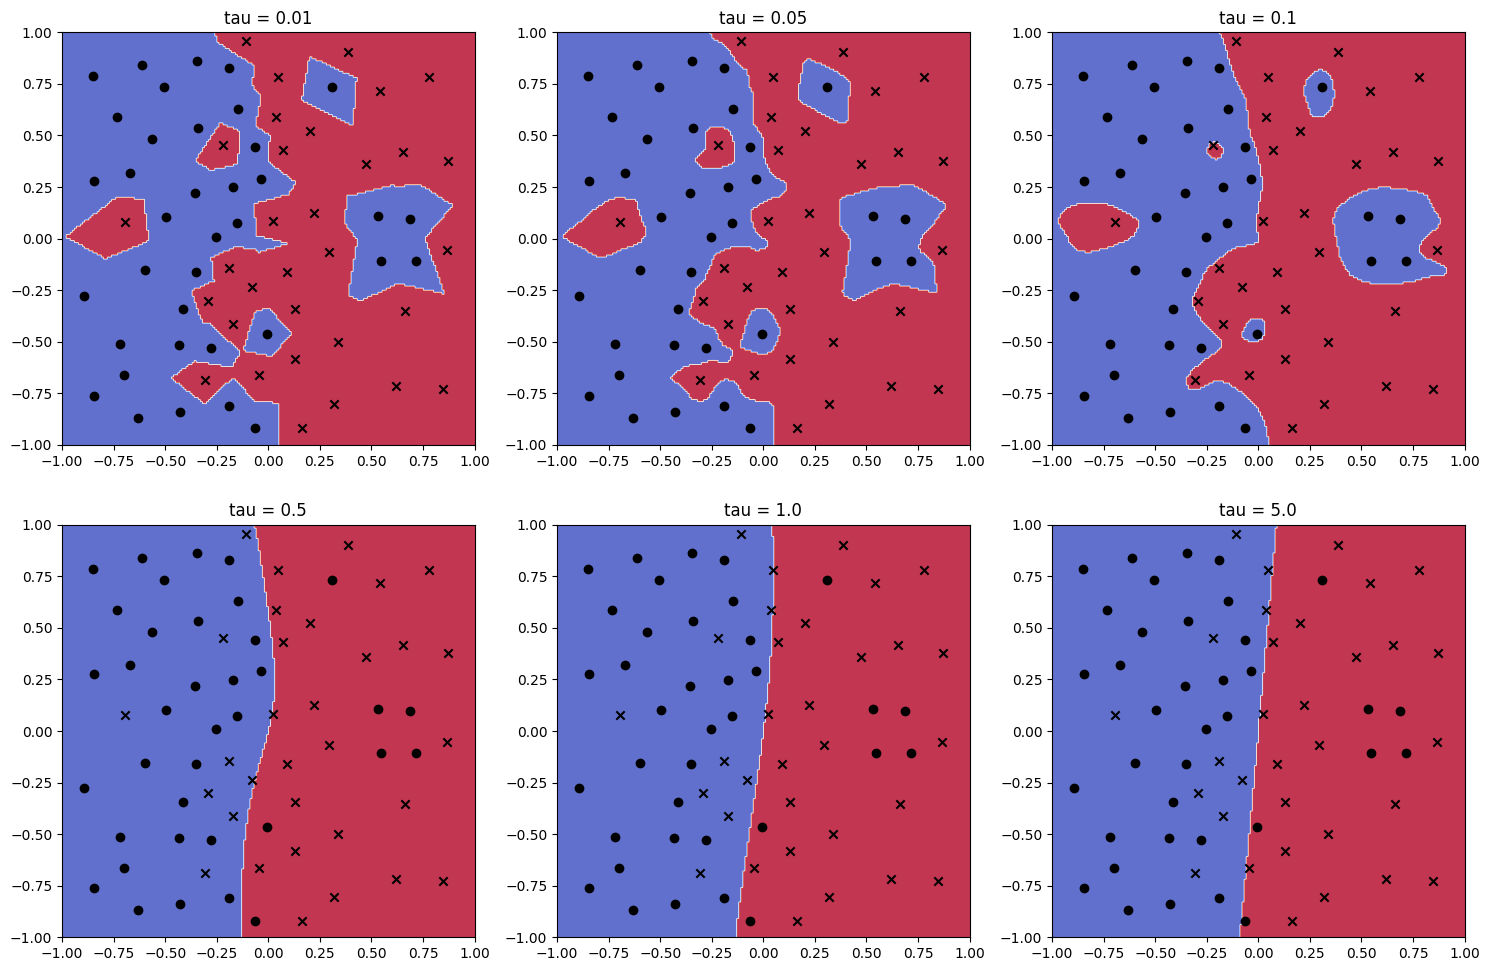

In [25]:
import matplotlib.pyplot as plt

def plot_lwlr(X, y, taus, res, lwlr_func, axes):
    for idx, tau in enumerate(taus):
        pred = np.zeros((res, res))
        
        for i in range(res):
            for j in range(res):
                x = np.array([2 * (i / (res - 1)) - 1, 2 * (j / (res - 1)) - 1])  # Mapping to [-1, 1]
                pred[j, i] = lwlr_func(X, y, x, tau)
        
        # Plot the result for the current tau
        ax = axes[idx // 3, idx % 3]  # Determine the appropriate subplot position
        ax.imshow(pred, extent=[-1, 1, -1, 1], origin='lower', cmap='coolwarm', alpha=0.8)
        ax.scatter(X[y == 0, 0], X[y == 0, 1], c='black', marker='o', label='Class 0')
        ax.scatter(X[y == 1, 0], X[y == 1, 1], c='black', marker='x', label='Class 1')
        ax.set_title(f"tau = {tau}")
        ax.axis('equal')
        ax.axis('square')

taus = [0.01, 0.05, 0.1, 0.5, 1.0, 5.0] 
res = 200 

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
plot_lwlr(X, y, taus, res, lwlr, axes)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
